# Choose Your Own Adventure: Drawing the Sierpinski Triangle

Alison Casson\
50307846\
MTH 337: Project 6

## Introduction to Fractals

Fractals are complex, never-ending geometric patterns created by repeating mathematical equations. The term 'fractal' was coined by the 20th-century mathematician Benoit Mandelbrot from "fractus," the Latin term meaning irregular or fragmented. Beyond their origin in mathematical equations, fractals exist naturally and can be easily observed in river systems, lightning bolts, seashells, and even galaxies.

One defining characteristic of fractals is their self-similarity. This means that if you zoom in or out of a fractal, the pattern does not change as a result of being made bigger or smaller. Fractals exhibit self-replication or self-similarity through iterations, a concept related to recursion. In a recursive process, each level is calculated using the outputs of the level before it. The recursive nature of fractals allows for the creation of complex structures through repetitive and self-referential patterns.

## What is Sierpinski's Triangle?

One of these geometric patterns is Sierpinski's Triangle. Sierpinski's Triangle is a self-replicating fractal named after the Polish mathematician Wacław Sierpiński. The construction of Sierpinski's Triangle involves iteratively removing triangles from a larger equilateral triangle.

### How Does This Construction Work?

The general idea for creating Sierpinski's Triangle is as follows:
1. Begin with an equilateral triangle.
2. Divide it into four equal smaller triangles.
3. Remove the central triangle.
4. Repeat the process for each of the remaining triangles.

This can be achieved by applying the midpoint formula to each side of the triangle.

## What is the Goal of This Report?

The goal of this report is to use recursion to generate code that draws Sierpinski triangle. After creating the code, the time it takes to create each level of the fractal will be compared to the level of the fractal. The information about the growth rate of the time complexity as the level increases helps to assess the code's performance and scalability.

In [1]:
import numpy as np                      # import the needed modules, libraries, and classes
import matplotlib.pyplot as plt
import math as mth
import time

from matplotlib.patches import Polygon

This first function, `tri`, had been created to generate Sierpinski's Triangle recursively. Using the midpoint formula, the triangle is split up into four triangles of equal sizes and the middle one is cut out. This is then repeated on each new tirangle for each level. 

In [3]:
def tri(p1,p2,p3,level):                                                  # Defines the 'tri' function and takes p1,p2,p3, and level as parameters
 
    if level <= 0:                                                        # Base case allows the function to stop calling itself recursively
        yield plt.gca().add_patch(Polygon([p1,p2,p3], color = 'purple'))  # Creates a generator to make a triangle with vertices p1, p2, and p3, and adds it to the current axes
        return                                                            
    
                                                                          # applies midpoint formula to each side of the triangle
    yield from tri(p1, (p1+p2)/2, (p1+p3)/2, level-1)                     # new polygons are created based on the orginal verticies
    yield from tri((p1+p2) / 2, p2, (p2+p3) / 2, level-1)  
    yield from tri((p1+p3) / 2, (p2+p3) / 2, p3, level-1) 

The `main` function is where a bulk of the code is. The purpose of it is to bring all of the functions (there were more, but they didn't work) into one place to create the visualization of Sierpinski's Triangle. This includes plots and calculations. 

In [5]:
def main(level):                                                                                 # Defines the 'main' function and takes a level as a parameter
    
    start = time.time()                                                                          # Starts recording the time
                                                                                                 
                                                                                                 # Defines/hardcodes the verticies of the intital equilateral triangle
    p1 = np.array([0.0, 0.0])                                                                                                                                     
    p2 = np.array([0.5, 1.0])
    p3 = np.array([1.0, 0.0])
    
    tri(p1,p2,p3, level)                                                                         # Calls the 'tri' function to generate the triangle using the given parameters
    
    figure,axes = plt.subplots()                                                                 # Creates a new figure and axes for the plot of the triangle
    plt.xlim(-0.5, 1.5)                                                                          # Sets the limit of the x-axis
    plt.ylim(-0.5, 1.5)                                                                          # Sets the limit of the y-axis
    axes.set_aspect('equal')                                                                     # Sets the aspect ratio of the plot
    plt.title("Sierpinski Triangle: Level " + str(level))                                        # Sets the title of the plot

    for patch in tri(np.array([0.0, 0.0]), np.array([0.5, 1.0]), np.array([1.0, 0.0]), level):   # Starts as orginal triangle
        plt.gca().add_patch(patch)                                                               # Adds smaller triangles within the larger ones at the given axes

         
    end = time.time()                                                                           # Stops the timer
    elapsed = end-start                                                                         # Calculates the time elapsed since the program began running
   
    plt.show()
    print("Generates in " + str(elapsed)+ " seconds.")                                          # Prints out the elapsed time in seconds
    
    return elapsed                                                                              # returns the elapsed time to be added to an array of elapsed time later on
    

The code below plots the first 10 levels of recursion (including 0) for Sierpinski's Triangle. The goal of this portion of code it to take the time it takes to create the triangle at certain levels and add it to an array of elapsed times.

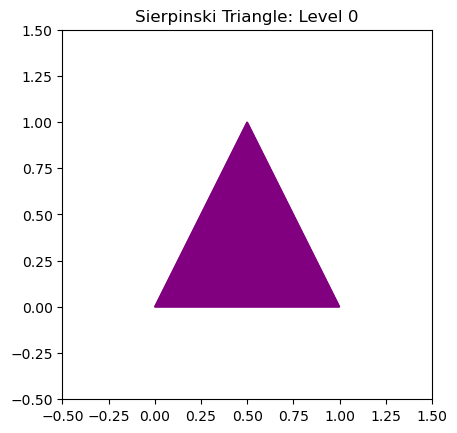

Generates in 0.09769415855407715 seconds.


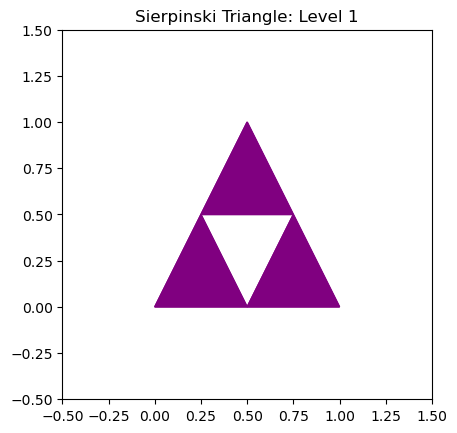

Generates in 0.019181489944458008 seconds.


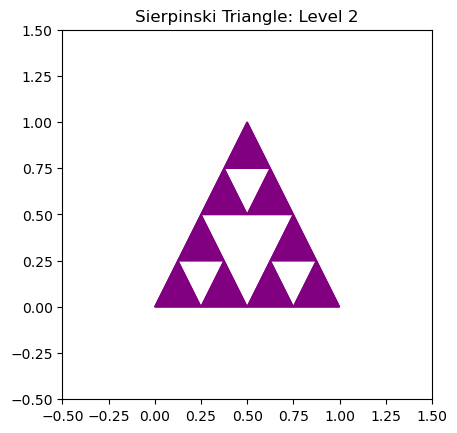

Generates in 0.022929906845092773 seconds.


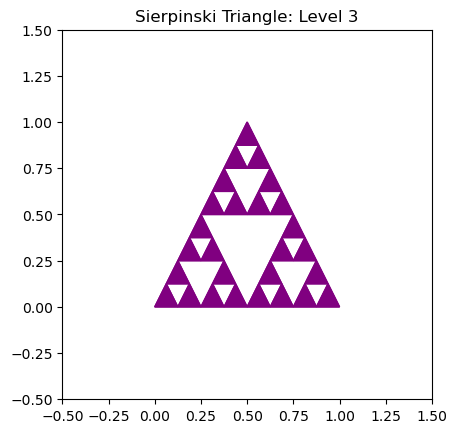

Generates in 0.10715746879577637 seconds.


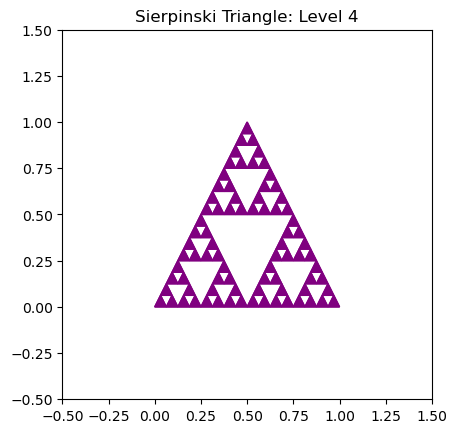

Generates in 0.09493136405944824 seconds.


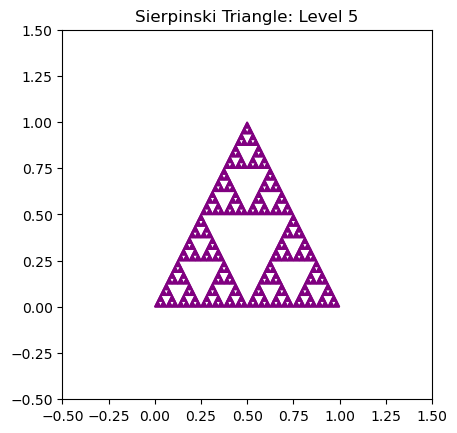

Generates in 0.311633825302124 seconds.


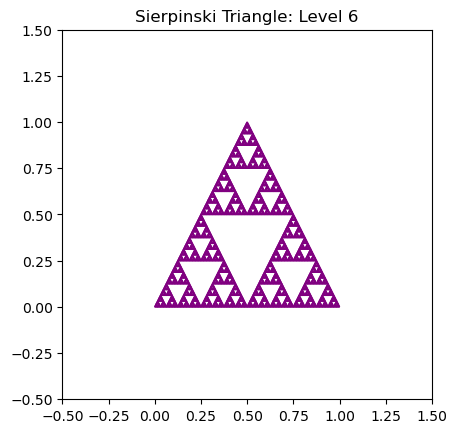

Generates in 0.824310302734375 seconds.


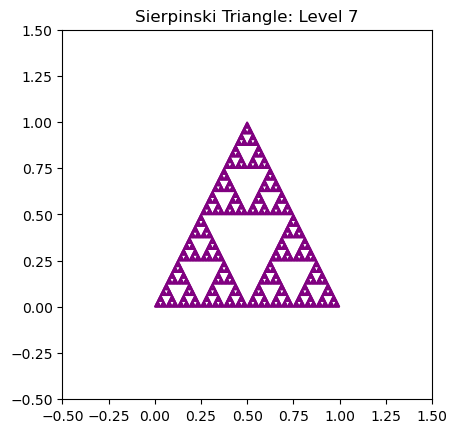

Generates in 2.4789962768554688 seconds.


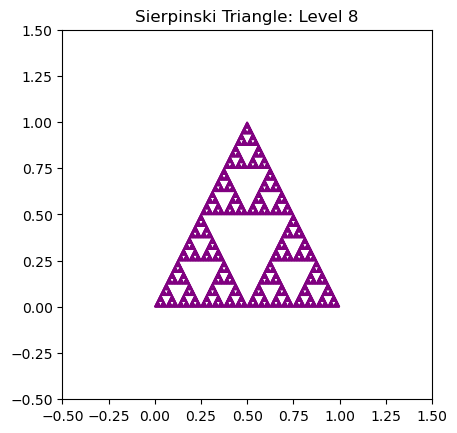

Generates in 7.984954833984375 seconds.


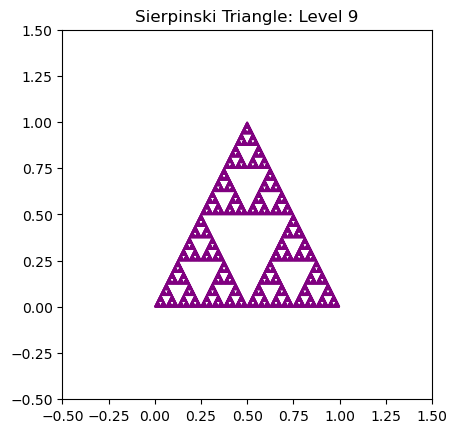

Generates in 23.517927408218384 seconds.


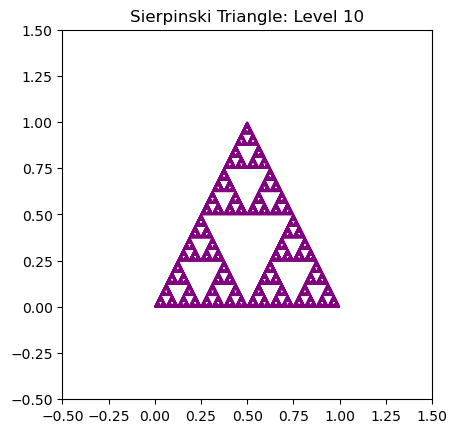

Generates in 66.80556392669678 seconds.


In [7]:
plot_levels = [0,1,2,3,4,5,6,7,8,9,10]    # Specifies the levels for each plot (hardcoded becuase I couldn't get an iterated array of values to work)

elapsed_times = []                        # Collects the elapsed times in an array

for level in plot_levels:                 # Create separate plots for each level in a loop
    elapsed_time = main(level)            # Calls the 'main' function and plots the triangle for the current level
    elapsed_times.append(elapsed_time)    # appends the elapsed time returned from the 'main' function to an array of ellapsed times

Plotting multiple levels of recursion on different graphs is inefficient and takes way more time than it should. Obviously, this way of creating each image is not the best way. I created the code this way so each plot, along with it's creation time, didn't have to be plotted by han $x$ times to get the amount of data needed. Each level can still be plotted individually. 

Below, the plot shows the relationship between the level of recursion and the time it took the create the triangle.

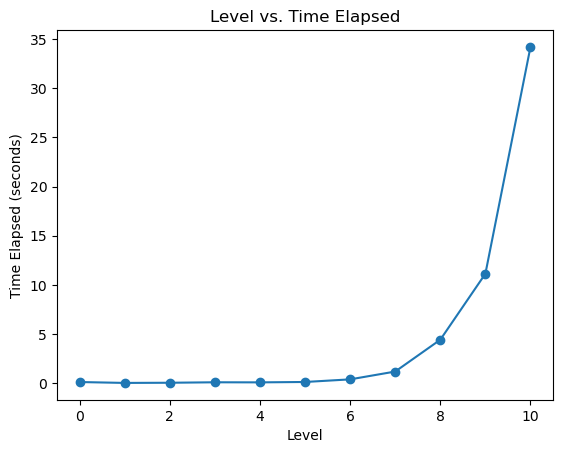

In [6]:
plt.figure()                                     # Creates a new figure for the plot
plt.plot(plot_levels, elapsed_times, marker='o') # Plots the elapsed time vs the levels of the triangle with each point shown with a data marker
plt.xlabel('Level')                              # Labels the x-axis
plt.ylabel('Time Elapsed (seconds)')             # Labels the y-axis
plt.title('Level vs. Time Elapsed')              # Gives the plot a title
plt.show()

From this plot, we can see that there is a positive exponential relationship between the level of recursion and the time it took to create the triangle. 

The exponential growth implies that computations become more intense and take more time with higher levels. Not only will increase the time it takes to solve, but it also requires more memory and processing power to finish the computations. 

### Individually Plotted Triangles

Here, we will look at a few different levels and look at the differences in the elapsed time. This will follow what is shown in the plot above, the exponential increase in computation time as the level increases.  

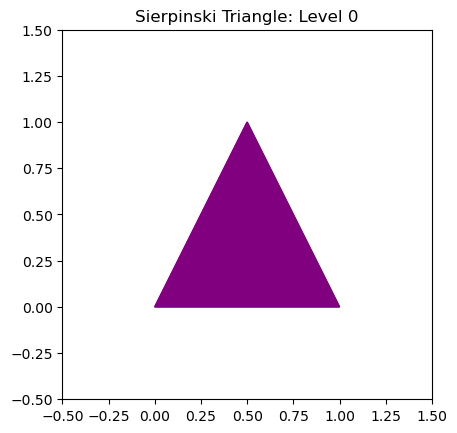

Generates in 0.06595563888549805 seconds.


0.06595563888549805

In [21]:
main(0)

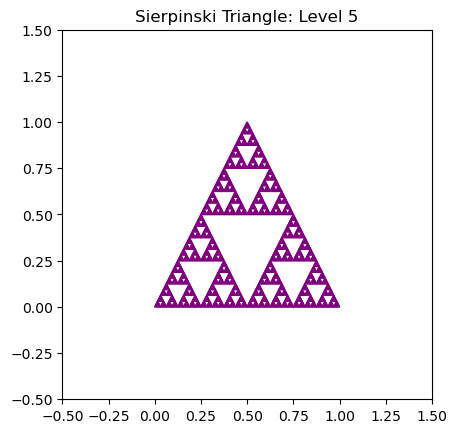

Generates in 0.13992094993591309 seconds.


0.13992094993591309

In [22]:
main(5)

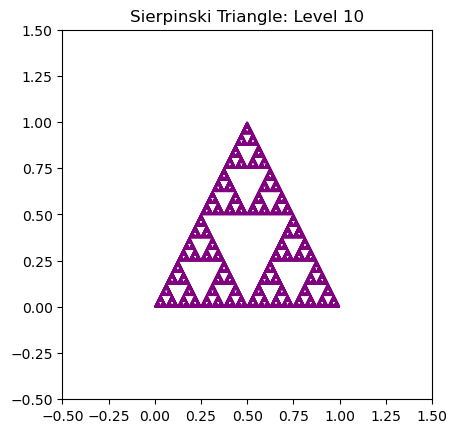

Generates in 114.43161916732788 seconds.


114.43161916732788

In [23]:
main(10)

### An Interactive Version

This code was orignally created in place of the code above to get the elapsed time values for each level. While it still takes time for the plot to be generated, it offers an easy and quick way to navigate and see how the recursion changes the original triangle. 

In [13]:
%matplotlib notebook                                                 
from ipywidgets import *                                             # Allows interactive plot and imports widgets from ipywidgits module

def interactiveTriangle(level = 0):                                  # defines the function 'interactiveTriangle' with a set level of 0
    
                                                                     # Defines/hardcodes the verticies of the intital equilateral triangle
    p1 = np.array([0.0, 0.0])                                        
    p2 = np.array([0.5, 1.0])
    p3 = np.array([1.0, 0.0])
        
    def update(level = 0):                                           # Defines a function 'update' with the level parameter set to 0 and is used to update the interactive wiget
        start = time.time()                                          # Starts recording the time 
        
        figure,axes = plt.subplots()                                 # Creates a new figure and axes for the plot of the triangle
        plt.xlim(-0.5, 1.5)                                          # Sets the limit of the x-axis
        plt.ylim(-0.5, 1.5)                                          # Sets the limit of the y-axis
        axes.set_aspect('equal')                                     # Sets the aspect ratio of the plot
        plt.title("Sierpinski Triangle: Level " + str(level) )       # Sets the title of the plot

        tri(p1,p2,p3,level)                                          # Calls the 'tri' function to generate the triangle using the given parameters
        
        for patch in tri(p1, p2, p3, level):                         # Starts as orginal triangle
            plt.gca().add_patch(patch)                               # Adds smaller triangles within the larger ones at the given axes
        
        end = time.time()                                            # Stops recording time
       
        print("Generates in " + str(end-start)+ " seconds.")         # Prints out the elapsed time
                
        figure.canvas.draw_idle()                                    # Redraws the plot

    interact(update, level=(0, 10, 1));                              # Creates the interactive widget, ranges from 0-10, increments by 1

Use the slider to see Sierpinski's Triangle at different levels. (Keep an eye on the figure number, the program will most likely crash if more than 20 are created)

In [15]:
interactiveTriangle()   # creates the widget to interact with the triangle

interactive(children=(IntSlider(value=0, description='level', max=10), Output()), _dom_classes=('widget-intera…

## Conclusion

In this project, the goal was to generate the Sierpinski triangle recursively and analyze the time complexity associated with increasing recursion levels. The primary objectives were to create code for Sierpinski triangle generation, measure the time required for each recursion level, and observe the relationship between time and recursion depth. The results of the investigation revealed that as the recursion depth increased, computation time increased exponentially. This also led to an increased need for memory and processing power. 

Throughout the project, I ran into a couple of issues where the level was set too high. If I had more time, I would add a break in the `tri` function where it would only run for a certain amount of time. hile this modification may not directly improve computation time, it could serve as a safeguard mechanism, allowing the program to exit the recursive sequence after a specified duration. I would also, using the data from the first 11 levels, figure out how to predict the computation time of higher levels. 